In [1071]:
import numpy as np
# Numpy is used in organizing the data into arrays
import pandas as pd 
# Pandas is used to read the dataset
import scipy.cluster.hierarchy as sch
# Scipy is used to visualize the hierarchial cluster as a dendrogram
import matplotlib.pyplot as plt
# Matplotlib is used to plot and data visualizing
from sklearn.cluster import AgglomerativeClustering as AC
# Sklearn is used to apply the Hierarchial clustering
from sklearn_extra.cluster import KMedoids
# Sklearn_extra is used to apply KMedoids clustering

In [1072]:
File=pd.read_csv('Mall_customers.csv')
File

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [1073]:
# First HIERARCHIAL CLUSTERING
# Preprocessing
# Numpy was very useful here to create the array that will be clustered 
X = np.array([File['Annual Income (k$)']]) 
Y = np.array([File['Spending Score (1-100)']]) 
for i in range(len(X)):
    Data=np.array([X[i],Y[i]])
# To Make sure that Data is correct
Data[:,10]

array([19, 14], dtype=int64)

In [1074]:
# Some preprocessing on the data 
C = np.array([File['CustomerID']])
G = np.array([File['Gender']])
NewG = np.zeros(200)
# This NewG is an array that converted string to Numbers 
# To be able to cluster it so Num 1 = Male & Num 2 =Female 
for i in range(200):
    if G[:,i] == "Male":
        # 1 for Male
        NewG[i] = 1 
    elif G[:,i] == "Female":
        # 2 for Female
        NewG[i] = 2
    else:
            break  
# NewG shape is (200,) but I will use NG which shapes is (1,200)          
NG = NewG.reshape((1, 200))
for i in range(len(C)):
    Data1 = np.array([C[i],NG[i]])

# Test our result 
#This result is True as 2 is the CustomerID & 1 = Male
Data1[:,1]

array([2., 1.])

In [1075]:
# Visualizing the data as a dendrogram
A = np.array(File['Age'])
NA = A.reshape((1, 200))
NG = NewG.reshape((1, 200))
for i in range(len(NA)):
    Data2 = np.array([NG[i],NA[i]])
NZ = np.concatenate((Z,Data2),axis=0)
#fig = plt.subplots(1,figsize=(12,6))
#HierDend = sch.dendrogram(sch.linkage(NZ,'single'))

In [1076]:
# Tests
for i in range(len(C)):
    Data3=np.array([Y[i],NA[i]])
TNZ=np.concatenate((NZ,Data3),axis=0)
#HierDend = sch.dendrogram(sch.linkage(TNZ,'single'))
for i in range(len(C)):
    Data4=np.array([NG[i],Y[i]])
TTNZ=np.concatenate((TNZ,Data4),axis=0)
#HierDend = sch.dendrogram(sch.linkage(TTNZ,'single'))

In [1077]:
# Hierarchial Cluster WITH K 5 Clusters , Euclidean Distance , Single linkage
# from the dendrogram K = 5 clusters
Final=np.resize(Data, (200,2))
for i in range(200):
    if i==199:
        break
    else:
        Final[i][1]=Y[0][i]
for i in range(200):
    if i==199:
        break
    else:
        Final[i][0]=X[0][i]


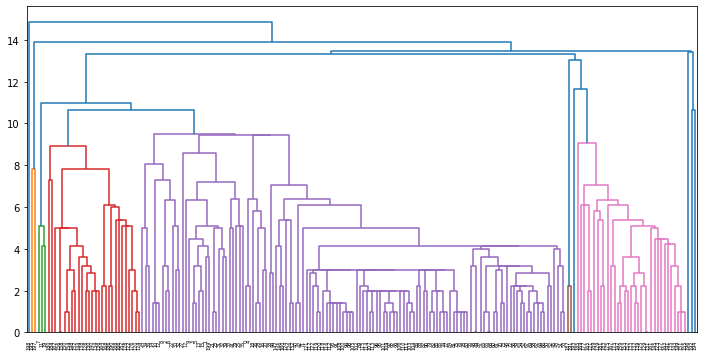

In [1078]:
plt.figure(figsize=(12, 6))
HierDend = sch.dendrogram(sch.linkage(Final,'single'))

In [1079]:
HierarchialCluster = AC(n_clusters =5,affinity ='euclidean',linkage ='single')
HierarchialCluster.fit_predict(Final)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 4, 2,
       3, 0], dtype=int64)

Text(0, 0.5, 'Distance')

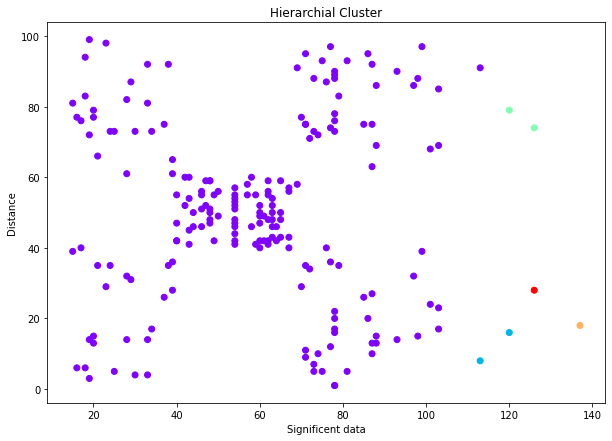

In [1080]:
plt.figure(figsize=(10, 7))
plt.scatter(Final[:,0],Final[:,1],c=HierarchialCluster.labels_,cmap='rainbow')

plt.title('Hierarchial Cluster')
plt.xlabel('Significent data')
plt.ylabel('Distance')

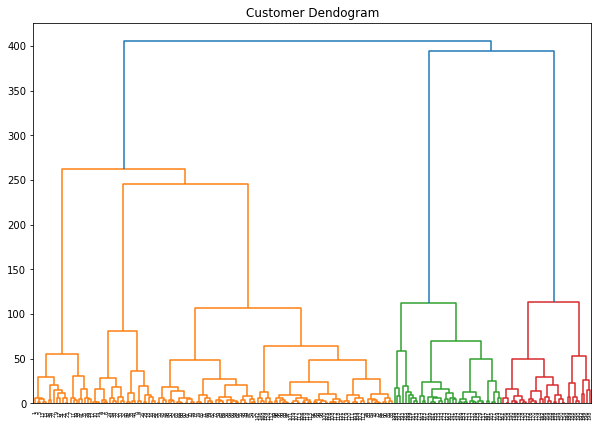

In [1081]:
# Using ward linkage strategy to test the Hierarchial Clustering
# Using ward linkage was excellent for Hierarchial Clustering
data = File.iloc[:, 3:5].values
plt.figure(figsize=(10, 7))
plt.title("Customer Dendogram")
dend = sch.dendrogram(sch.linkage(data, method='ward'))

In [1082]:
# Using ward linkage strategy to test the Hierarchial Clustering
# Using ward linkage was excellent for Hierarchial Clustering
HierarchialCluster1 = AC(n_clusters =5,affinity ='euclidean',linkage ='ward')
HierarchialCluster1.fit_predict(Final)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 3], dtype=int64)

Text(0, 0.5, 'Distance')

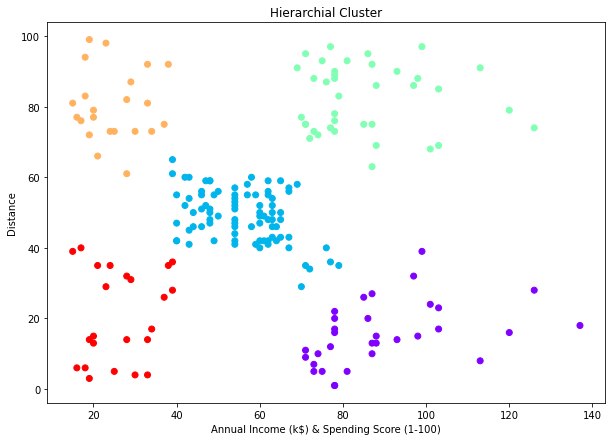

In [1083]:
# Here Hierarchial Clustering is more accurate and better than KMedoids cluster
plt.figure(figsize=(10, 7))
plt.scatter(Final[:,0],Final[:,1],c=HierarchialCluster1.labels_,cmap='rainbow')
plt.title('Hierarchial Cluster')
plt.xlabel('Annual Income (k$) & Spending Score (1-100)')
plt.ylabel('Distance')

In [1084]:
data1 = File.iloc[:, 2:4].values

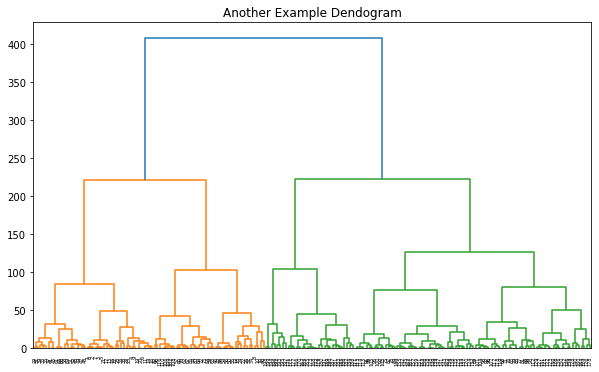

In [1085]:
# Another Example
plt.figure(figsize=(10, 6))
plt.title("Another Example Dendogram")
dend1 = sch.dendrogram(sch.linkage(data1, method='ward'))

In [1086]:
HierarchialCluster2 = AC(n_clusters =5,affinity ='euclidean',linkage ='ward')
HierarchialCluster2.fit_predict(data1)

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 4, 2, 2, 4, 2, 1, 2, 1, 2, 4, 2, 1, 4,
       2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 1, 4, 2, 4, 1, 2, 1, 1,
       1, 4, 2, 4, 4, 4, 1, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Text(0, 0.5, 'Distance')

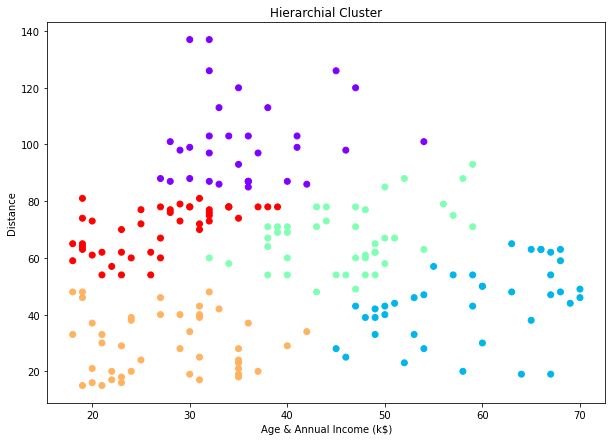

In [1087]:
# More accurate result here at Hierarchial Clustering
plt.figure(figsize=(10, 7))
plt.scatter(data1[:,0],data1[:,1],c=HierarchialCluster2.labels_,cmap='rainbow')
plt.title('Hierarchial Cluster')
plt.xlabel('Age & Annual Income (k$)')
plt.ylabel('Distance')

In [1088]:
# Secondly KMedoids WITH K=5 Clusters and Manhattan distance
clu = KMedoids(n_clusters=5,metric="manhattan",init='random',random_state=33)
clu.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

Text(0, 0.5, 'Distance')

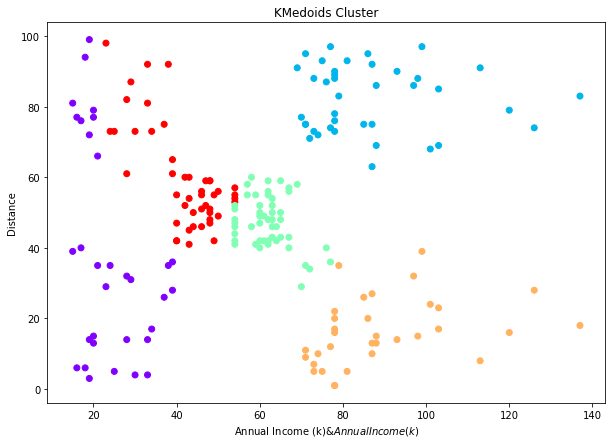

In [1089]:
# Kmedoid is better here only if we compare it with hierarchal clustering using single linkage 
# The green & red are a mess as well as red & purple 
# Hierarchial is better in case of using ward linkage only
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1],c=clu.labels_,cmap='rainbow')
plt.title('KMedoids Cluster')
plt.xlabel('Annual Income (k$) & Annual Income (k$)')
plt.ylabel('Distance')

Text(0, 0.5, 'Distance')

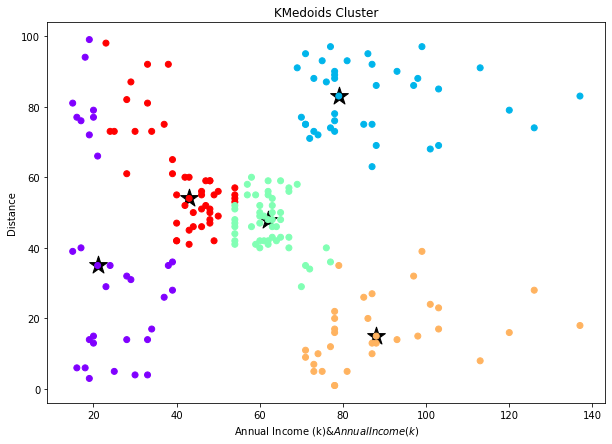

In [1090]:
plt.figure(figsize=(10, 7))
plt.scatter(clu.cluster_centers_[:,0],clu.cluster_centers_[:,1],c='black',s=350,marker='*')
plt.scatter(data[:,0],data[:,1],c=clu.labels_,cmap='rainbow')
plt.title('KMedoids Cluster')
plt.xlabel('Annual Income (k$) & Annual Income (k$)')
plt.ylabel('Distance')

In [1091]:
print('INDICES : ',clu.medoid_indices_)
print('Cluster Centers : \n',clu.cluster_centers_)

INDICES :  [ 16 161 101 176  52]
Cluster Centers : 
 [[21 35]
 [79 83]
 [62 48]
 [88 15]
 [43 54]]


In [1092]:
cluENH = KMedoids(n_clusters=4,metric="manhattan",init='random',random_state=33)
cluENH.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int64)

Text(0, 0.5, 'Distance')

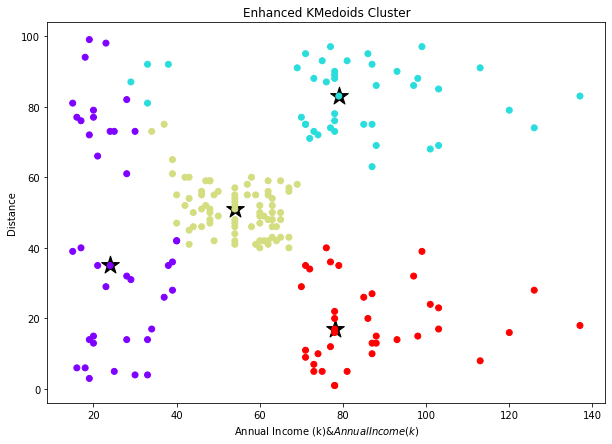

In [1093]:
plt.figure(figsize=(10, 7))
plt.scatter(cluENH.cluster_centers_[:,0],cluENH.cluster_centers_[:,1],c='black',s=350,marker='*')
plt.scatter(data[:,0],data[:,1],c=cluENH.labels_,cmap='rainbow')
plt.title('Enhanced KMedoids Cluster')
plt.xlabel('Annual Income (k$) & Annual Income (k$)')
plt.ylabel('Distance')

In [1094]:
# Another Example Using Kmedoids
clu1 = KMedoids(n_clusters=5,metric="manhattan",init='random',random_state=33)
clu1.fit_predict(data1)

array([0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 0, 4, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 4, 2, 2, 2, 4, 0, 2, 4, 0, 4, 2, 4, 0,
       2, 4, 0, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 4, 2, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 2, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1], dtype=int64)

Text(0, 0.5, 'Distance')

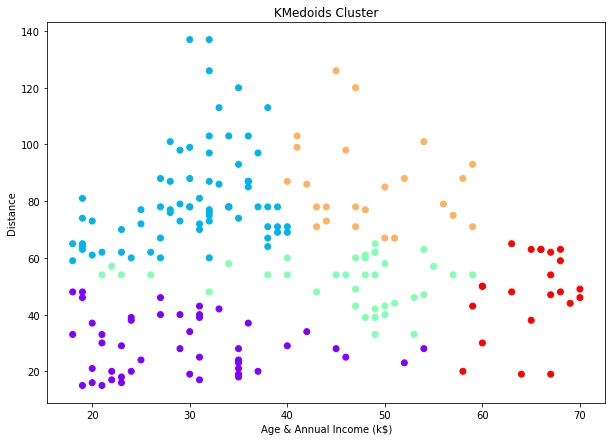

In [1095]:
# Here we can see clearly that Agglomarative Hierarchial Clustering is MUCH better than  KMedoids
plt.figure(figsize=(10, 7))
plt.scatter(data1[:,0],data1[:,1],c=clu1.labels_,cmap='rainbow')
plt.title('KMedoids Cluster')
plt.xlabel('Age & Annual Income (k$)')
plt.ylabel('Distance')

In [1096]:
print('INDICES : ',clu1.medoid_indices_)
print('Cluster Centers : \n',clu1.cluster_centers_)

INDICES :  [ 25 147  85 154  62]
Cluster Centers : 
 [[29 28]
 [32 77]
 [48 54]
 [47 78]
 [67 47]]


Text(0, 0.5, 'Distance')

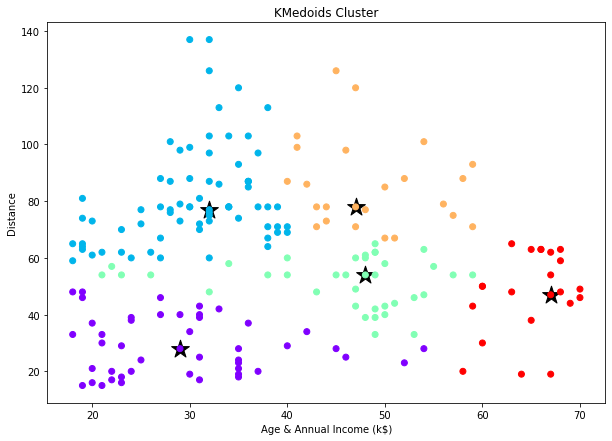

In [1097]:
plt.figure(figsize=(10, 7))
# The simple ( * ) represent Cluster centers
# Which created more accuracy & more clear visual representation
plt.scatter(clu1.cluster_centers_[:,0],clu1.cluster_centers_[:,1],c='black',s=350,marker='*')
plt.scatter(data1[:,0],data1[:,1],c=clu1.labels_,cmap='rainbow')
plt.title('KMedoids Cluster')
plt.xlabel('Age & Annual Income (k$)')
plt.ylabel('Distance')